# The Elias Delta Code

The Elias delta code is a universal, prefix-free code for encoding positive integers. Given a positive integer $n$, the Elias delta codeword of $n$ is denoted by $\delta(n)$, while the Elias gamma codeword of $n$ is denoted by $\gamma(n)$.

For a positive integer $n$, the Elias delta code $\delta(n)$ is constructed as follows:

1. Let $b = \text{binary}(n)$ without leading zeros.
2. Let $L = \text{len}(b)$.
3. Output $\gamma(L)$ followed by $b$ without its leading $1$.

Example:

- $\delta(1) = 1$
- $\delta(4) = 011\_00 = 01100$
- $\delta(9) = 00100\_001 = 00100001$

*Note: The underscores in the above examples are included only for readability to separate pieces of the codewords; they are not part of the actual codewords.*

In this notebook, we'll implement encoding, decoding, and length functions for the Elias delta code.


# Imports

In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

# Function Definitions

In this section, we define the core functions for Elias delta coding:

- `delta_encode`
- `delta_decode`
- `delta_length`
- `delta_implied_probability`

These functions form the foundation for encoding, decoding, and analyzing universal codes throughout this demo.

## `delta_encode`

Encode a positive integer or a sequence of positive integers using Elias delta coding.

In [2]:
def delta_encode(numbers, collapse=True):
    def gamma_encode(number):
        binary = bin(number)[2:]
        length = len(binary)
        return "0" * (length - 1) + binary

    if isinstance(numbers, int):
        number = numbers
        if number <= 0:
            raise ValueError("Number must be positive")
        binary = bin(number)[2:]
        length = len(binary)
        prefix = gamma_encode(length)
        return prefix + binary[1:]

    try:
        encoded = [delta_encode(number) for number in numbers]
        return "".join(encoded) if collapse else encoded
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

## `delta_decode`

Decode an Elias delta codeword or a sequence of codewords into their corresponding positive integers.

In [3]:
def delta_decode(code, as_list=False):
    results = []
    index = 0

    while index < len(code):
        # decode gamma(L)
        num_zeros = 0
        while code[index] == "0":
            num_zeros += 1
            index += 1

        num_L_bits = num_zeros + 1
        L_bits = code[index:index+num_L_bits]
        L = int(L_bits, 2)
        index += num_L_bits

        # read remaining bits of n
        if index + (L - 1) > len(code):
            raise ValueError("Malformed Elias delta code")

        tail = code[index:index + L - 1]
        index += L - 1

        binary = "1" + tail
        results.append(int(binary, 2))

    return results if as_list or len(results) > 1 else results[0]

## `delta_length`

Return the length of the Elias delta codeword for a positive integer.

In [4]:
def delta_length(numbers, as_list=False):
    def length(number):
        if number <= 0:
            raise ValueError("Number must be positive")

        L = int(np.floor(np.log2(number))) + 1
        gamma_L_len = int(2 * np.floor(np.log2(L)) + 1)
        return gamma_L_len + (L - 1)

    if isinstance(numbers, int):
        return length(numbers) if not as_list else [length(numbers)]

    try:
        return [length(number) for number in numbers]
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

## `delta_implied_probability`

Compute the implied probability of Elias delta codewords.

In [5]:
def delta_implied_probability(numbers, as_list=False):
    def prob(number):
        if number <= 0:
            raise ValueError("Number must be positive")
        return np.exp2(-delta_length(number))

    if isinstance(numbers, int):
        return [prob(numbers)] if as_list else prob(numbers)

    try:
        return [prob(n) for n in numbers]
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

# Encoding / Decoding Example

We encode several positive integers, decode them, and compute code lengths.

In [6]:
numbers = [1, 2, 3, 5, 8, [3,2], [2,3,5]]
encoded = [delta_encode(number) for number in numbers]
decoded = [delta_decode(code) for code in encoded]
lengths = [delta_length(number) for number in numbers]
probs = [delta_implied_probability(number) for number in numbers]

results_df = pd.DataFrame(
    list(zip(encoded, decoded, lengths, probs)),
    index=pd.Index(numbers, name="Message"),
    columns=[
        "Elias Delta Codeword", "Decoded", "Codeword Length(s)", "Probability (Implied)"
    ]
)

with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(results_df)

,Elias Delta Codeword,Decoded,Codeword Length(s),Probability (Implied)
Message,,,,
1,1,1,1,0.5
2,0100,2,4,0.0625
3,0101,3,4,0.0625
5,01101,5,5,0.03125
8,00100000,8,8,0.003906
"[3, 2]",01010100,"[3, 2]","[4, 4]","[0.0625, 0.0625]"
"[2, 3, 5]",0100010101101,"[2, 3, 5]","[4, 4, 5]","[0.0625, 0.0625, 0.03125]"


## Visualizing Delta Code Lengths

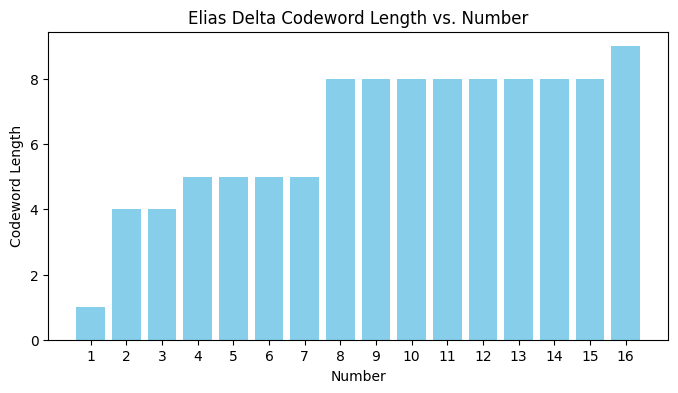

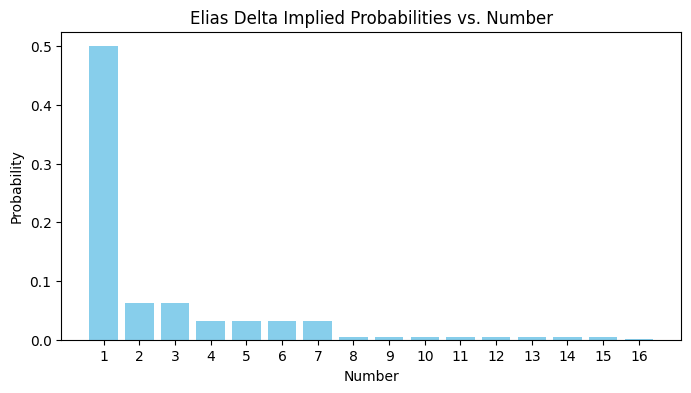

In [7]:
numbers = list(range(1, 17))
code_lengths = [delta_length(number) for number in numbers]
probs = [delta_implied_probability(number) for number in numbers]

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(numbers, code_lengths, color="skyblue")
ax.set_xlabel("Number")
ax.set_ylabel("Codeword Length")
ax.set_title("Elias Delta Codeword Length vs. Number")
ax.set_xticks(numbers)
plt.show()

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(numbers, probs, color="skyblue")
ax.set_xlabel("Number")
ax.set_ylabel("Probability")
ax.set_title("Elias Delta Implied Probabilities vs. Number")
ax.set_xticks(numbers)
plt.show()

### Notes
- Elias delta coding builds on Elias gamma coding for better compression on very large numbers.
- It remains a prefix code and uniquely decodable.
- Often outperforms gamma coding when encoding large integers.
- Used in advanced universal coding schemes and compression systems.